In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data2.txt', sep=",", header=None)
df.columns = ["x", "y"]
print("Total number of readings in the dataset is",len(df))

Total number of readings in the dataset is 97


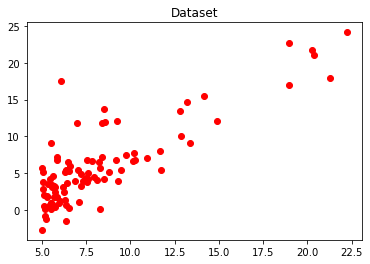

In [3]:
plt.plot(df["x"],df["y"],"ro")
plt.title("Dataset")
plt.show()

In [4]:
# Normal equation 

x = np.c_[np.ones((97, 1)), df["x"]]
theta = np.linalg.inv(x.T @ x) @ x.T @ df["y"]

print("The value of theta in the normal equation is: ",theta)

The value of theta in the normal equation is:  [-3.89578088  1.19303364]


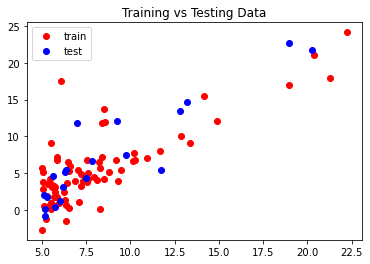

In [5]:
# Train Test Splitting the dataset

xTrain, xTest, yTrain, yTest = train_test_split(df["x"], df["y"], test_size=0.2, random_state=9)

# Plotting training and testing data

plt.plot(xTrain,yTrain,"ro",label="train")
plt.plot(xTest,yTest,"bo", label = "test")
plt.title("Training vs Testing Data")
plt.legend(loc = "best")
plt.show()

In [6]:
# Reshaping dataset

m = len(xTrain)
x_train = np.reshape(xTrain.values,(m,1))
y_train = np.reshape(yTrain.values,(m,1))

Text(0.5, 1.0, 'MSE vs Iterations Batch Gradient Descent')

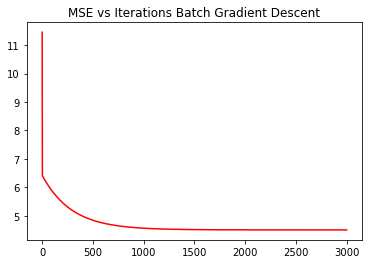

In [7]:
# Batch Gradient Descent and plotting 

def cost_calculate(theta,x,y):
    cost_value = np.sum(np.square(((np.dot(x, theta)) - y))) / (2 * (len(x)))  
    return cost_value

def gradient_descent(x,y,theta,learning_rate,iterations):
    m = len(x)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for k in range(iterations):
        prediction = np.dot(x,theta)
        theta = theta -(1/m)*learning_rate*( x.T.dot((prediction - y)))
        theta_history[k,:] = theta.T
        cost_history[k]  = cost_calculate(theta,x,y)
    return theta, cost_history, theta_history


learning_rate = 0.01
iterations = 3000
thetaTrain = np.random.randn(2,1)
X = np.c_[np.ones((len(x_train),1)),x_train]
thetaTrain,costHistory,thetaHistory = gradient_descent(X,y_train,thetaTrain,learning_rate,iterations)


plt.plot(range(iterations),costHistory, "r")
plt.title("MSE vs Iterations Batch Gradient Descent")

Text(0.5, 1.0, 'MSE vs Iterations Stochastic Gradient Descent')

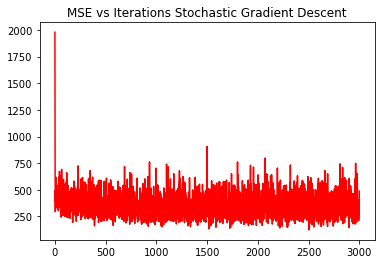

In [8]:
# Stochastic Gradient Descent and plotting 

def gradient_descent2(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    costHistory = np.zeros(iterations) 
    for k in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_calculate(theta,X_i,y_i)
        costHistory[k]  = cost
    return theta, costHistory



learning_rate = 0.01
iterations = 3000
thetaTrain = np.random.randn(2,1)
X = np.c_[np.ones((len(x_train),1)),x_train]
thetaTrain , costHistory = gradient_descent2(X,y_train,thetaTrain,learning_rate,iterations)


plt.plot(range(iterations),costHistory, "r")
plt.title("MSE vs Iterations Stochastic Gradient Descent")

### Termination Condition

1. Batch Gradient Descent - In batch gradient descent the MSE value seems to be dropping rapidly and then starts to plateau at around 1500 iterations for a learning rate of 0.01
<br><br>
2. Stochastic gradient descent - On the contrary in case of Stochastic gradient descent, the MSE value drops rapidly after first few attempts and then fluctuates under 1000 no matter how many further iterations are processed


### Accuracy
It seems obvious that the batch gradient descent is performing reliably better on the given dataset

### Speed of convergence
Stochastic gradient descent converges much faster when compared to batch gradient descent

Text(0.5, 1.0, 'MSE vs learning rate for batch gradient descent')

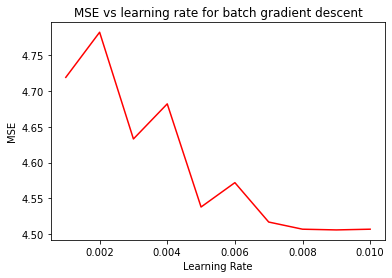

In [9]:
# Using batch gradient descent with different learning rates

learning_rate = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
costFunction = []

m = len(xTrain)
x_train = np.reshape(xTrain.values,(m,1))
y_train = np.reshape(yTrain.values,(m,1))

for i in learning_rate:
    iterations = 1500
    theta = np.random.randn(2,1)
    X = np.c_[np.ones((len(x_train),1)),x_train]
    theta,costHistory,thetaHistory = gradient_descent(X,y_train,theta,i,iterations)
    costFunction.append(round(costHistory[iterations-1],3))
    
plt.plot(learning_rate, costFunction, "r")
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('MSE vs learning rate for batch gradient descent')

Text(0.5, 1.0, 'MSE vs learning rate for batch gradient descent')

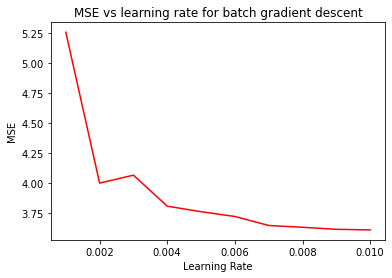

In [10]:
# Using batch gradient descent with different learning rates on test set

learning_rate = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
costFunction = []

m = len(xTest)
x_train = np.reshape(xTest.values,(m,1))
y_train = np.reshape(yTest.values,(m,1))

for i in learning_rate:
    iterations = 1500
    theta = np.random.randn(2,1)
    X = np.c_[np.ones((len(x_train),1)),x_train]
    theta,costHistory,thetaHistory = gradient_descent(X,y_train,theta,i,iterations)
    costFunction.append(round(costHistory[iterations-1],3))
    
plt.plot(learning_rate, costFunction, "r")
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('MSE vs learning rate for batch gradient descent')

### Overall, the learning rate of 0.01 seems to be giving the least MSE values. Higher the learning rate, quicker the MSE converges.